In [1]:
import os    
#os.environ['THEANO_FLAGS'] = "device=gpu1"  
#os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32,lib.cnmem=1"
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32"
import theano

from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import *
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold

from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc as misc
from scipy.ndimage import *
import random
from skimage import transform
%matplotlib inline

# this is the size of our encoded representations
#encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
#encoding_dim = 3
encoding_dim = 25


# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(676, activation='relu')(input_img) #26X26
encoded = Dense(484, activation='relu')(encoded) #22X22
encoded = Dense(324, activation='relu')(encoded)  #18X18
encoded = Dense(144, activation='relu')(encoded)  #12X12
encoded = Dense(64, activation='relu')(encoded)  #8X8

encoded = Dense(encoding_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input

decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input=input_img, output=decoded)


Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN not available)
Using Theano backend.


In [2]:
print (encoding_dim)
print (input_img)
print (encoded)
print (decoded)
print (autoencoder)

25
input_1
Elemwise{mul,no_inplace}.0
sigmoid.0


In [3]:
# this model maps an input to its encoded representation
encoder = Model(input=input_img, output=encoded)

In [4]:
print (encoder)

In [5]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

In [6]:
print (encoded_input)
print (decoder_layer)
print (decoder)

input_2


In [7]:
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy')

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print (y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [213]:
from scipy.ndimage import *
rotate = random.uniform(-10, 10)
print(rotate)
rotation=np.deg2rad(rotate)
print(rotation)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train_rotated=x_train
print(x_train.shape)
print(y_train.shape)
print(x_train_rotated.shape)
shift_y, shift_x = np.array(x_train_rotated.shape[1:]) / 2.
print(shift_y)
print(shift_x)
tf_rotate = transform.SimilarityTransform(rotation=np.deg2rad(rotate))
tf_shift = transform.SimilarityTransform(translation=[-shift_x, -shift_y])
tf_shift_inv = transform.SimilarityTransform(translation=[shift_x, shift_y])

#x_train_rotated = transform.warp(x_train_rotated, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
x_train_rotated = interpolation.rotate(x_train,45,reshape=False)
print(x_train_rotated.shape)



-7.737056822892001
-0.135037115973
(60000, 28, 28)
(60000,)
(60000, 28, 28)
14.0
14.0
(60000, 28, 28)


In [9]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [228]:
# Random Rotations
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
# reshape to be [samples][pixels][width][height]
#x_train_rotated = np.empty(np.reshape(1,28,28))
#y_train_rotated = np.empty(np.reshape(1,))
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
# convert from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
print(datagen)
# fit parameters from data
datagen.fit(x_train)
print(datagen)
batches=0
batch_size=10000
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=batch_size):
    # create a grid of 3x3 images
    """
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break
    """
    #x_train = np.vstack([x_train,X_batch])
    #y_train = np.vstack([y_train,y_batch])
    print(X_batch.shape)
    print(y_batch.shape)
    batches += 1
    print (batches)
    if batches >= 60000 / batch_size:
        # we need to break the loop by hand because
         # the generator loops indefinitely
        break
print(x_train.shape)
print(y_train.shape)



Exception: X (images tensor) and y (labels) should have the same length. Found: X.shape = (61000, 1, 28, 28), y.shape = (60000,)

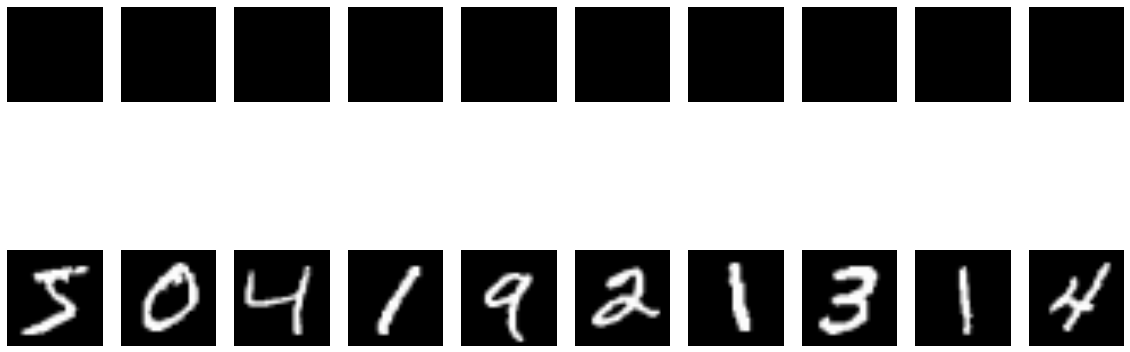

In [207]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    
    ax = plt.subplot(2, n, i + 1)
    #ax = plt.subplot(1, n, i)
    plt.imshow(x_train_rotated[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + n+1)
    #ax = plt.subplot(1, n, i)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [150]:
x_train = np.vstack([x_train,x_train_rotated])
print(x_train.shape)

(120000, 28, 28)


In [151]:
y_train = np.hstack([y_train,y_train])

In [152]:
print(y_train.shape)

(120000,)


In [153]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [154]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(len(x_train))
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)
print (x_train.dtype)
print (x_test.dtype)
print (x_train)
print (x_test)

120000
(120000, 784)
(10000, 784)
(120000,)
(10000,)
float32
float32
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [155]:
nfold=10
nb_epoch=50
batch_size=256
random_state =335

In [156]:
kfold_weights_path = os.path.join('mnist_weights_kfold_' + str(nfold) + 
                                  '_epoch_'+str(nb_epoch)+
                                  '_batch_'+str(batch_size) +
                                  '_encoded_'+str(encoding_dim) +
                                  '.h5')
print(kfold_weights_path)

mnist_weights_kfold_10_epoch_50_batch_256_encoded_25.h5


In [157]:
kf = KFold(len(x_train), n_folds=nfold, shuffle=True, random_state=random_state)
#kf = KFold(len(x_train), n_folds=nfold, shuffle=False, random_state=random_state)
#Shuffle false give very high training loss and very low val loss - indicating unknown fit

print(kf)

sklearn.cross_validation.KFold(n=120000, n_folds=10, shuffle=True, random_state=335)


In [158]:
train_full_encoded_imgs = np.zeros(shape=[x_train.shape[0],encoding_dim])
print(train_full_encoded_imgs.shape)
print(x_test.shape)
test_full_encoded_imgs = np.zeros(shape=[x_test.shape[0],encoding_dim])
test_full_decoded_imgs = np.zeros(shape=[x_test.shape[0],x_test.shape[1]])
print(test_full_encoded_imgs.shape)
print(test_full_decoded_imgs.shape)

(120000, 25)
(10000, 784)
(10000, 25)
(10000, 784)


In [159]:
os.path.isfile(kfold_weights_path)

True

In [160]:
#if os.path.isfile(kfold_weights_path):
autoencoder.load_weights(kfold_weights_path)

In [161]:
num_fold = 0
restore_from_last_checkpoint=0
for train_index,valid_index in kf:
    s_train,s_valid  = x_train[train_index], x_train[valid_index]
    
    noise_factor = 0.4
    s_train_noisy = s_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=s_train.shape) 
    s_valid_noisy = s_valid + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=s_valid.shape) 

    s_train_noisy = np.clip(s_train_noisy, 0., 1.)
    s_valid_noisy = np.clip(s_valid_noisy, 0., 1.)
    #y_train, y_test = y[train_index], y[test_index]
    
    num_fold += 1
    print('\n\nStart KFold number {} from {}'.format(num_fold, nfold))
    print('Split train: ', len(s_train_noisy), len(s_train))
    print('Split valid: ', len(s_valid_noisy), len(s_valid))

    if not os.path.isfile(kfold_weights_path) or restore_from_last_checkpoint == 0:
        callbacks = [
                EarlyStopping(monitor='val_loss', patience=2, verbose=0),
                ModelCheckpoint(kfold_weights_path, monitor='val_loss', save_best_only=True, verbose=0),
        ]
        autoencoder.fit(s_train_noisy, s_train,
                nb_epoch=nb_epoch,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(s_valid_noisy, s_valid),
                callbacks=callbacks)
        
    # Store train predictions
    train_encoded_imgs = encoder.predict(x_train,batch_size=batch_size, verbose=1)
    train_full_encoded_imgs = np.add(train_full_encoded_imgs,train_encoded_imgs)

    
    # Store test predictions
    test_encoded_imgs = encoder.predict(x_test,batch_size=batch_size, verbose=1)
    #full_encoded_imgs = np.vstack([full_encoded_imgs,encoded_imgs])
    test_full_encoded_imgs = np.add(test_full_encoded_imgs,test_encoded_imgs)
    #full_encoded_imgs.append(encoded_imgs)
    #print(full_encoded_imgs.shape)
    
    test_decoded_imgs = decoder.predict(test_encoded_imgs,batch_size=batch_size, verbose=1)
    #full_decoded_imgs = np.vstack([full_decoded_imgs,decoded_imgs])
    test_full_decoded_imgs = np.add(test_full_decoded_imgs,test_decoded_imgs)



Start KFold number 1 from 10
Split train:  108000 108000
Split valid:  12000 12000
Train on 108000 samples, validate on 12000 samples
Epoch 1/50
108000/108000 [==============================] - 11s - loss: 263.5867 - val_loss: 261.2253
Epoch 2/50
108000/108000 [==============================] - 11s - loss: 262.8013 - val_loss: 261.3163
Epoch 3/50
108000/108000 [==============================] - 11s - loss: 262.3139 - val_loss: 261.3680
Epoch 4/50
 9728/10000 [============================>.] - ETA: 0s

Start KFold number 2 from 10
Split train:  108000 108000
Split valid:  12000 12000
Train on 108000 samples, validate on 12000 samples
Epoch 1/50
108000/108000 [==============================] - 11s - loss: 263.0586 - val_loss: 266.2171
Epoch 2/50
108000/108000 [==============================] - 11s - loss: 262.1873 - val_loss: 266.1986
Epoch 3/50
108000/108000 [==============================] - 11s - loss: 261.6869 - val_loss: 265.9908
Epoch 4/50
108000/108000 [=========================

In [162]:
print(test_full_encoded_imgs.shape)
print(test_full_decoded_imgs.shape)
print(test_full_encoded_imgs)
print(test_full_decoded_imgs)

(10000, 25)
(10000, 784)
[[ 198.00200081  319.10205078  372.58710098 ...,  182.16121483
   310.40496635  198.8699379 ]
 [ 200.10501289  103.05292034  363.60796928 ...,  329.97345161
   363.52709961  197.74863815]
 [ 181.60050678   14.56499144    4.6125727  ...,  249.60132217
   366.75123787  192.58431625]
 ..., 
 [  84.03156662  156.85078716   92.92380476 ...,   73.0881958   292.3668251
   121.79456329]
 [ 229.53847313  326.06836319  499.76499557 ...,   92.13601971
   176.82476616   89.00327158]
 [   0.          263.20069504   27.18844581 ...,  241.30573654
    65.55662441  194.2867527 ]]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  5.21967608e-37   1.53573946e-38   0.00000000e+00 ...,   3.84494225e-37
    7.98936469e-37   1.04496656e-36]
 [  6.56727159e-33   2.74015324e-31   3.05764481e-34 ...,   2.36470379e-32
    7.34498665e-35   5.62322241e-32]
 ..., 
 [  9.42555691e-23   2.72578534e-21   2.41876790e-22 ...,   1

In [163]:
test_res_encoded_imgs = test_full_encoded_imgs/nfold
test_res_decoded_imgs = test_full_decoded_imgs/nfold
print(test_res_encoded_imgs.shape)
print(test_res_decoded_imgs.shape)
print(test_res_encoded_imgs)
print(test_res_decoded_imgs)

(10000, 25)
(10000, 784)
[[ 19.80020008  31.91020508  37.2587101  ...,  18.21612148  31.04049664
   19.88699379]
 [ 20.01050129  10.30529203  36.36079693 ...,  32.99734516  36.35270996
   19.77486382]
 [ 18.16005068   1.45649914   0.46125727 ...,  24.96013222  36.67512379
   19.25843163]
 ..., 
 [  8.40315666  15.68507872   9.29238048 ...,   7.30881958  29.23668251
   12.17945633]
 [ 22.95384731  32.60683632  49.97649956 ...,   9.21360197  17.68247662
    8.90032716]
 [  0.          26.3200695    2.71884458 ...,  24.13057365   6.55566244
   19.42867527]]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  5.21967608e-38   1.53573946e-39   0.00000000e+00 ...,   3.84494225e-38
    7.98936469e-38   1.04496656e-37]
 [  6.56727159e-34   2.74015324e-32   3.05764481e-35 ...,   2.36470379e-33
    7.34498665e-36   5.62322241e-33]
 ..., 
 [  9.42555691e-24   2.72578534e-22   2.41876790e-23 ...,   1.39979151e-22
    6.11778513e-25   

In [164]:
train_res_encoded_imgs = train_full_encoded_imgs/nfold
print(train_res_encoded_imgs.shape)
print(train_res_encoded_imgs)

(120000, 25)
[[ 12.24470053  11.84684505   6.10971704 ...,  11.14900179  39.20093613
   33.99163532]
 [  9.30463257  14.14381399   9.99225187 ...,  13.61744614  18.05998631
   14.72986078]
 [ 50.65711632   0.          18.51358271 ...,  36.04721298   1.99698203
   16.14298325]
 ..., 
 [ 10.05596828   1.7871342   10.77090502 ...,   6.51911473  32.85294151
   29.65401955]
 [ 10.05596828   1.7871342   10.77090502 ...,   6.51911473  32.85294151
   29.65401955]
 [ 10.05596828   1.7871342   10.77090502 ...,   6.51911473  32.85294151
   29.65401955]]


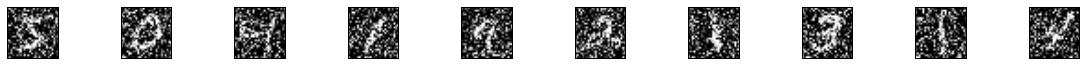

In [165]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    #ax = plt.subplot(1, n, i)
    plt.imshow(s_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

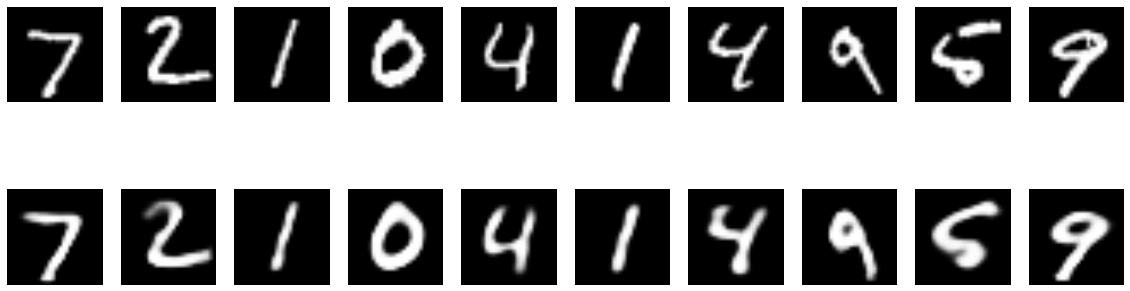

In [166]:

n = 10  # how many digits we will display
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    #ax = plt.subplot(2, n, i + 1 + n)
    #plt.imshow(encoded_imgs[i].reshape(6, 6))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
   
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_res_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [167]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf = clf.fit(train_res_encoded_imgs, np.ravel(y_train))

In [168]:
y_pred = clf.predict(test_res_encoded_imgs)

In [169]:
num=len(test_res_encoded_imgs)
r=0
w=0
wrngclassidx=[]
y_test = np.ravel(y_test)
for i in range(num):
        #print ('y_pred ',y_pred[i])
        #print ('labels ',labels[i])
        #without the use of all() returns error truth value of an array with more than one element is ambiguous
        #if y_pred[i].all() == labels[i].all():
        if np.array_equal(y_pred[i],y_test[i]):
            r+=1
        else:
            w+=1
            wrngclassidx.append(i)
print ("tested ",  num, "digits")
print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
print ("got correctly ", float(r)*100/(r+w), "%")
print (len(wrngclassidx))

tested  10000 digits
correct:  9610 wrong:  390 error rate:  3.9 %
got correctly  96.1 %
390


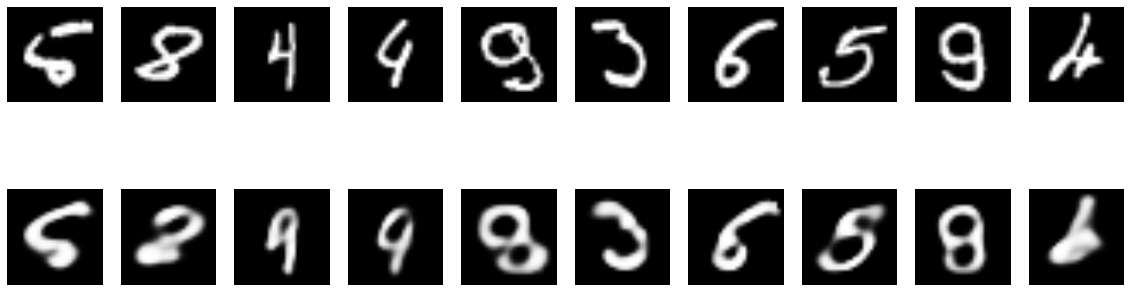

[5, 8, 4, 4, 9, 3, 6, 5, 9, 4]
[6, 2, 9, 9, 8, 2, 5, 0, 8, 2]


In [170]:
n = 10 
actual=[]
predicted=[]
# how many misclassified digits we will display
i=0
plt.figure(figsize=(20, 6))
for idx in wrngclassidx:
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[idx].reshape(28, 28))
        actual.append(y_test[idx])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(test_res_decoded_imgs[idx].reshape(28, 28))
        #print(y_pred[idx])
        predicted.append(y_pred[idx])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        i+=1
        if i==10 :
            break
plt.show()
print (actual)
print (predicted)

In [171]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [172]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

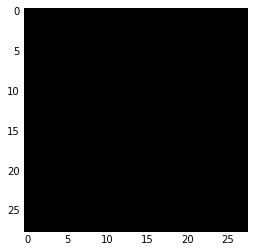

In [173]:
plt.imshow(x_train_rotated[401].reshape(28, 28))
from scipy import misc as misc
resized = misc.imresize(x_train_rotated[401].reshape(28, 28), (28, 28), interp='bilinear')


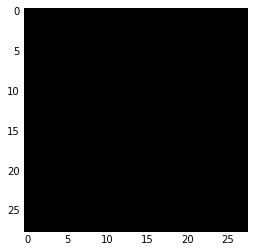

In [174]:
plt.imshow(resized)